In [288]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

from urllib.request import urlopen
from xmltodict import parse
from zipfile import ZipFile
from io import BytesIO
from scipy.stats import ttest_rel

# Homework #1

Remember: You must ingest the data to your notebooks directly from the data server. Also, don't write the same code with modifications to do similar things over and over again. Write a function.

## Question #1

For this question use the data [at this link](https://data.ibb.gov.tr/dataset/hourly-public-transport-data-set).

1. Calculate total hourly uses of different modes of transports (RAY, KARAYOLU, DENİZ) as pandas data frames for January 2021 and May 2021. Do you see any differences in usage patterns? Explain.
2. Calculate total hourly uses of different transfer types (AKTARMA, NORMAL) as pandas data frames for June 2020 and in September 2020.
3. Plot the results for step #1 and #2.
4. Calculate the daily totals for each line, and find out the busiest lines in each day of April 2020
5. Calculate the daily totals of passenger numbers and passage numbers, then calculate the daily ratios of passage numbers by passenger numbers for August 2020. What do the numbers tell you?


### 1. Calculate total hourly uses of different modes of transports (RAY, KARAYOLU, DENİZ) as pandas data frames for January 2021 and May 2021. Do you see any differences in usage patterns? Explain.

In [289]:
def seperate_date_time(df):
    df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])
    df['TIME'] = df.DATE_TIME.dt.time
    df['DATE'] = df.DATE_TIME.dt.date

In [290]:
def seperate_types(df, key):
    result = [1, 2 , 3]
    types = np.unique(df[key])

    i = 0
    for type in types:
        result[i] = (df[df[key] == type])
        i = i + 1
    return result

In [291]:
with urlopen('https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/004994f5-3a50-4721-8787-41d4940bdaee/download/hourly_transportation_202101.csv') as file:
    jan2021_df = pd.read_csv(file)

with urlopen('https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/42b4a830-fee6-4765-9daf-3f3884f09b4b/download/hourly_transportation_202105.csv') as file:
    may2021_df = pd.read_csv(file)

In [292]:
seperate_date_time(jan2021_df)
seperate_date_time(may2021_df)

In [293]:
jan2021_passenger_count_df = jan2021_df.groupby(['TIME', 'TRANSPORT_TYPE_DESC'], as_index=False)['NUMBER_OF_PASSENGER'].sum()
may2021_passenger_count_df = may2021_df.groupby(['TIME', 'TRANSPORT_TYPE_DESC'], as_index=False)['NUMBER_OF_PASSENGER'].sum()

In [294]:
jan2021_transport_count_dfs = seperate_types(jan2021_passenger_count_df, 'TRANSPORT_TYPE_DESC')
may2021_transport_count_dfs = seperate_types(may2021_passenger_count_df, 'TRANSPORT_TYPE_DESC')

In [295]:
transport_types = np.unique(may2021_passenger_count_df['TRANSPORT_TYPE_DESC'])

In [296]:
i = 0
for transport in transport_types:
        data = pd.DataFrame({'TIME': jan2021_transport_count_dfs[i]['TIME'],
                'JAN_PASSENGER': jan2021_transport_count_dfs[i]['NUMBER_OF_PASSENGER'],
                'MAY_PASSENGER': may2021_transport_count_dfs[i]['NUMBER_OF_PASSENGER']})
        print(transport+':')
        display(data)
        i = i + 1

DENİZ:


,TIME,JAN_PASSENGER,MAY_PASSENGER
0,00:00:00,145,15
3,01:00:00,87,8
6,02:00:00,85,6
9,03:00:00,92,14
12,04:00:00,378,49
15,05:00:00,2085,134
18,06:00:00,30359,1032
21,07:00:00,111333,3785
24,08:00:00,132216,3711
27,09:00:00,105872,3067


KARAYOLU:


,TIME,JAN_PASSENGER,MAY_PASSENGER
1,00:00:00,22597,1794
4,01:00:00,5912,570
7,02:00:00,3226,358
10,03:00:00,2889,277
13,04:00:00,9329,711
16,05:00:00,295514,14360
19,06:00:00,2015264,118770
22,07:00:00,4470111,234365
25,08:00:00,4540180,195331
28,09:00:00,3032496,117133


RAY:


,TIME,JAN_PASSENGER,MAY_PASSENGER
2,00:00:00,8450,87
5,01:00:00,1005,59
8,02:00:00,840,38
11,03:00:00,624,35
14,04:00:00,992,89
17,05:00:00,78582,4739
20,06:00:00,724509,39731
23,07:00:00,2029193,82916
26,08:00:00,2561421,76179
29,09:00:00,1770417,49494


There is a significant difference between January and May. The reason behind this difference is that the data from May 2021 only consists first three days of the month.

Usage patterns are pretty much the same in both months. There are two peaks, one at around 8 o'clock and the other at around 17 o'clock. The reason for these peaks is that people go to school and work.

***

### 2. Calculate total hourly uses of different transfer types (AKTARMA, NORMAL) as pandas data frames for June 2020 and in September 2020.

In [297]:
with urlopen('https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/4f1c434d-bd1f-4937-b88f-6e2df1a85dc5/download/hourly_transportation_202006.csv') as file:
    june2020_df = pd.read_csv(file)

with urlopen('https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/5b3b12b7-575d-4b55-b497-62e3b544edb0/download/hourly_transportation_202009.csv') as file:
    sept2020_df = pd.read_csv(file)

In [298]:
seperate_date_time(june2020_df)
seperate_date_time(sept2020_df)

In [299]:
june2020_transfer_count_df = june2020_df.groupby(['TIME', 'TRANSFER_TYPE'], as_index=False)['NUMBER_OF_PASSENGER'].sum()
sept2020_transfer_count_df = sept2020_df.groupby(['TIME', 'TRANSFER_TYPE'], as_index=False)['NUMBER_OF_PASSENGER'].sum()

In [300]:
june2020_transfer_count_dfs = seperate_types(june2020_transfer_count_df, 'TRANSFER_TYPE')
sept2020_transfer_count_dfs = seperate_types(sept2020_transfer_count_df, 'TRANSFER_TYPE')

In [301]:
transfer_types = np.unique(june2020_transfer_count_df['TRANSFER_TYPE'])

In [302]:
i = 0
for transfer_type in transfer_types:
        data1 = june2020_transfer_count_dfs[i]
        data2 = sept2020_transfer_count_dfs[i]

        print(transfer_type+' (June 2020):')
        display(data1)
        print(transfer_type+' (Sept 2020):')
        display(data2)
        i = i + 1

AKTARMA (June 2020):


,TIME,TRANSFER_TYPE,NUMBER_OF_PASSENGER
0,00:00:00,AKTARMA,11823
2,01:00:00,AKTARMA,133
4,02:00:00,AKTARMA,1
7,04:00:00,AKTARMA,11
9,05:00:00,AKTARMA,4933
11,06:00:00,AKTARMA,179819
13,07:00:00,AKTARMA,538744
15,08:00:00,AKTARMA,706835
17,09:00:00,AKTARMA,623922
19,10:00:00,AKTARMA,592951


AKTARMA (Sept 2020):


,TIME,TRANSFER_TYPE,NUMBER_OF_PASSENGER
0,00:00:00,AKTARMA,19104
2,01:00:00,AKTARMA,214
4,02:00:00,AKTARMA,36
6,03:00:00,AKTARMA,28
8,04:00:00,AKTARMA,26
10,05:00:00,AKTARMA,5820
12,06:00:00,AKTARMA,186911
14,07:00:00,AKTARMA,627312
16,08:00:00,AKTARMA,896402
18,09:00:00,AKTARMA,798011


NORMAL (June 2020):


,TIME,TRANSFER_TYPE,NUMBER_OF_PASSENGER
1,00:00:00,NORMAL,150355
3,01:00:00,NORMAL,34213
5,02:00:00,NORMAL,14752
6,03:00:00,NORMAL,9123
8,04:00:00,NORMAL,13614
10,05:00:00,NORMAL,362206
12,06:00:00,NORMAL,2633377
14,07:00:00,NORMAL,5791437
16,08:00:00,NORMAL,5762988
18,09:00:00,NORMAL,3671724


NORMAL (Sept 2020):


,TIME,TRANSFER_TYPE,NUMBER_OF_PASSENGER
1,00:00:00,NORMAL,248258
3,01:00:00,NORMAL,65694
5,02:00:00,NORMAL,34857
7,03:00:00,NORMAL,19972
9,04:00:00,NORMAL,28127
11,05:00:00,NORMAL,430161
13,06:00:00,NORMAL,3313527
15,07:00:00,NORMAL,7854819
17,08:00:00,NORMAL,8186398
19,09:00:00,NORMAL,5162148


***

### 3. Plot the results for step #1 and #2.

In [303]:
def plot_types_hourly(dfs, types, months):
    fig, axs = plt.subplots(1, len(types))
    fig.set_figwidth(20)
    i = 0
    for type in types:
        for j in range(len(months)):
            dfs[j][i].plot(ax = axs[i], x='TIME', y='NUMBER_OF_PASSENGER')

        axs[i].set_xlabel('time')
        axs[i].set_ylabel('passenger count')
        axs[i].set_title(type)
        axs[i].legend([month for month in months])

        i = i + 1   

##### (1) Total hourly uses of different modes of transports (RAY, KARAYOLU, DENİZ) for January 2021 and May 2021:

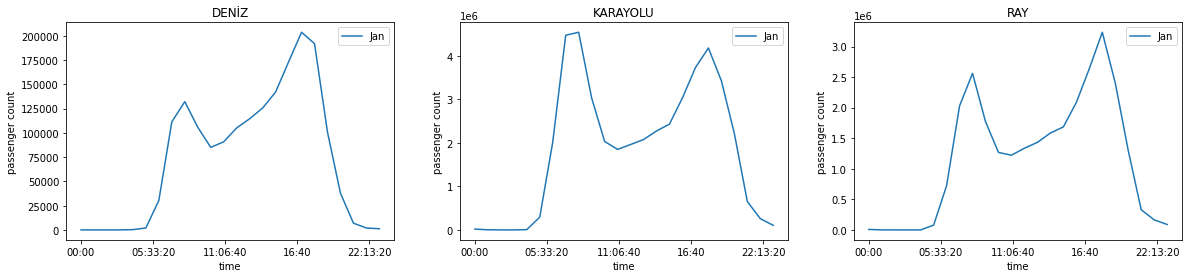

In [304]:
plot_types_hourly([jan2021_transport_count_dfs], transport_types, ['Jan'])


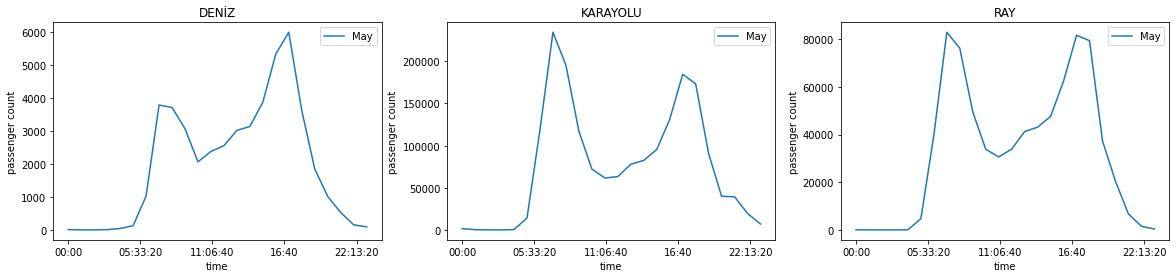

In [305]:
plot_types_hourly([may2021_transport_count_dfs], transport_types, ['May'])

The data from May 2021 only consists first three days of the month so the total number of passengers is not for the entire month, so the line of May looks flat in this graph:

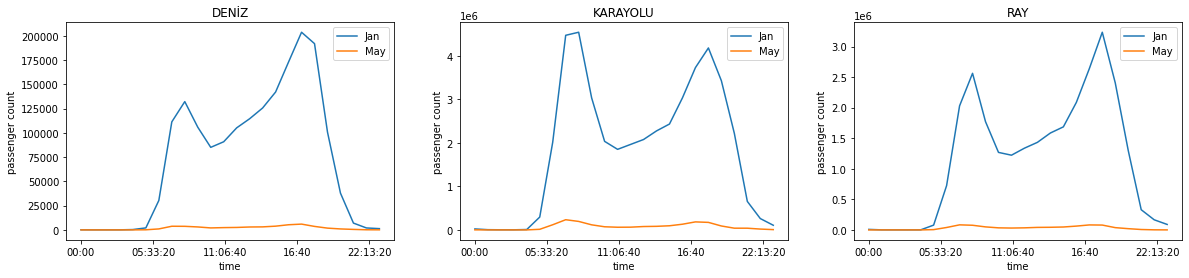

In [306]:
plot_types_hourly([jan2021_transport_count_dfs, may2021_transport_count_dfs], transport_types, ['Jan', 'May'])


##### (2) Total hourly uses of different transfer types (AKTARMA, NORMAL) for June 2020 and in September 2020

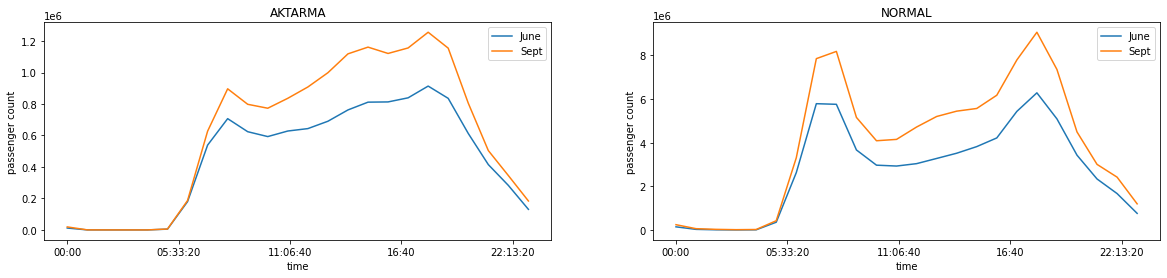

In [307]:
plot_types_hourly([june2020_transfer_count_dfs, sept2020_transfer_count_dfs], transfer_types, ['June', 'Sept'])

***

### 4. Calculate the daily totals for each line, and find out the busiest lines in each day of April 2020

In [308]:
with urlopen('https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/75e25417-36df-4822-8a18-578f0f7a584a/download/hourly_transportation_202004.csv') as file:
    april2020_df = pd.read_csv(file)

In [309]:
seperate_date_time(april2020_df)

Daily totals for each line:

In [310]:
april2020_line_daily_df = april2020_df.groupby(['DATE', 'LINE'], as_index=False)['NUMBER_OF_PASSENGER'].sum()

april2020_line_daily_df

,DATE,LINE,NUMBER_OF_PASSENGER
0,2020-04-01,AKSARAY-HAVALİMANI,62308
1,2020-04-01,EDİRNEKAPI-SULTANÇİFTLİĞİ,35099
2,2020-04-01,KABATAŞ-BAĞCILAR,46421
3,2020-04-01,KADIKÖY-KARTAL METROSU,24436
4,2020-04-01,KADIKÖY-MODA,124
...,...,...,...
461,2020-04-30,ÖHO,414726
462,2020-04-30,ÜSKÜDAR ÇEKMEKÖY METROSU,26228
463,2020-04-30,İETT,218113
464,2020-04-30,İETT TÜNEL,961


Busiest lines in each day:

In [311]:
daily_busiest_lines =  april2020_line_daily_df.loc[april2020_line_daily_df.groupby('DATE')['NUMBER_OF_PASSENGER'].idxmax()]

daily_busiest_lines

,DATE,LINE,NUMBER_OF_PASSENGER
12,2020-04-01,ÖHO,350599
30,2020-04-02,ÖHO,326565
48,2020-04-03,ÖHO,341859
66,2020-04-04,ÖHO,254928
84,2020-04-05,ÖHO,161687
100,2020-04-06,ÖHO,326333
116,2020-04-07,ÖHO,321206
131,2020-04-08,ÖHO,319022
146,2020-04-09,ÖHO,320074
161,2020-04-10,ÖHO,337263


***

### 5. Calculate the daily totals of passenger numbers and passage numbers, then calculate the daily ratios of passage numbers by passenger numbers for August 2020. What do the numbers tell you?


In [312]:
with urlopen('https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/a195a42f-727a-4f1e-ad55-471306788c99/download/hourly_transportation_202008.csv') as file:
    aug2020_df = pd.read_csv(file)

In [313]:
seperate_date_time(aug2020_df)

In [314]:
aug2020_line_daily_passage = april2020_df.groupby(['DATE'], as_index=False)['NUMBER_OF_PASSAGE'].sum()
aug2020_line_daily_passenger = april2020_df.groupby(['DATE'], as_index=False)['NUMBER_OF_PASSENGER'].sum()

In [315]:
ratios = aug2020_line_daily_passage['NUMBER_OF_PASSAGE']/aug2020_line_daily_passenger['NUMBER_OF_PASSENGER']
dates = aug2020_line_daily_passage['DATE']

ratio_df = pd.DataFrame({'DATE':dates, 'RATIO':ratios})

ratio_df

,DATE,RATIO
0,2020-04-01,1.062171
1,2020-04-02,1.061728
2,2020-04-03,1.064217
3,2020-04-04,1.066265
4,2020-04-05,1.076607
5,2020-04-06,1.059946
6,2020-04-07,1.061129
7,2020-04-08,1.059447
8,2020-04-09,1.060530
9,2020-04-10,1.061025


This table shows the daily ratios of passage numbers by passenger numbers. For example, we can calculate daily mean from this data.

In [316]:
ratio_df['RATIO'].mean()

1.0619258471916098

***

## Question #2

For this question use the data [at this link](https://alaska.usgs.gov/products/data.php?dataid=522). This dataset contains isotope values of muscle tissue from fish collected in the nearshore Beaufort Sea, Alaska in summers 2017-2019.

1. Calculate the average lengths of fish sampled at each location in the years 2017, 2018 and 2019.
2. Can you statistically observe any differences in lengths between the years 2018 and 2019?
3. Calculate the average concentration of C13 and N15 for the samples collected at each location in the years 2017, 2018 and 2019.
4. Can you statistically observe any differences in C13 and N15 concentrations between the years 2018 and 2019?
5. Can we do the same comparisons for the year 2017 against 2018 or 2019? Why doesn't this work? What should we do to make these comparisons to work?

### 1. Calculate the average lengths of fish sampled at each location in the years 2017, 2018 and 2019.

In [317]:
def seperate_year(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year

In [318]:
def x_means(df, years, x):
    return df[df.Year.isin(years)].groupby(['Location', 'Year'], as_index=False)[x].mean()

In [319]:
def p_value_x(df, year1, year2, x):
    t, p = ttest_rel(df[df['Year'] == year1][x],
                     df[df['Year'] == year2][x])
    return p

In [320]:
with urlopen('https://alaska.usgs.gov/data/aquaticEcology/fish/fish_stableIsotopes_beaufort_stanek/fish_stableIsotopes_beaufort_stanek.zip') as url:
    zf = ZipFile(BytesIO(url.read()))
    fish_df = pd.read_csv(zf.open('fish_stableIsotopes_beaufort_stanek.csv'))

fish_df

,FishID,CommonName,Date,Region,Location,Latitude,Longitude,mmLength,d13C,d15N,CtoN
0,ARCI005,Arctic Cisco,2018-08-11,eastern,Kaktovik Lagoon,70.0907,-143.6593,323.0,-22.37,14.45,3.88
1,ARCI014,Arctic Cisco,2018-08-12,eastern,Kaktovik Lagoon,70.0907,-143.6593,128.0,-25.68,8.55,4.16
2,ARCI021,Arctic Cisco,2017-08-06,eastern,Kaktovik Lagoon,70.0907,-143.6593,48.0,-25.75,9.78,4.61
3,ARCI038,Arctic Cisco,2017-08-05,eastern,Kaktovik Lagoon,70.0907,-143.6593,57.0,-25.61,9.69,5.90
4,ARCI040,Arctic Cisco,2017-08-09,eastern,Kaktovik Lagoon,70.0907,-143.6593,79.0,-24.88,10.04,4.01
...,...,...,...,...,...,...,...,...,...,...,...
787,THST009,Threespine Stickleback,2019-07-22,central,Simpson Lagoon,70.5156,-149.4676,82.0,-20.51,12.93,3.88
788,THST010,Threespine Stickleback,2019-07-22,central,Simpson Lagoon,70.5156,-149.4676,78.0,-19.99,14.16,3.98
789,THST011,Threespine Stickleback,2019-07-28,central,Simpson Lagoon,70.4986,-149.5987,74.0,-20.23,13.63,3.79
790,THST012,Threespine Stickleback,2019-07-28,central,Simpson Lagoon,70.4986,-149.5987,82.0,-20.21,14.04,4.02


In [321]:
seperate_year(fish_df)

Average lengths of fish sampled at each location in the years 2017, 2018 and 2019:

In [322]:
years = [2017, 2018, 2019]

In [323]:
length_means = x_means(fish_df, years, 'mmLength')
length_means

,Location,Year,mmLength
0,Jago Lagoon,2017.0,265.485714
1,Jago Lagoon,2018.0,275.125000
2,Jago Lagoon,2019.0,299.181818
3,Kaktovik Lagoon,2017.0,154.469697
4,Kaktovik Lagoon,2018.0,254.647727
5,Kaktovik Lagoon,2019.0,274.212121
6,Simpson Lagoon,2018.0,202.634146
7,Simpson Lagoon,2019.0,217.428571
8,Stefansson Sound,2018.0,220.860656
9,Stefansson Sound,2019.0,235.557143


***

### 2. Can you statistically observe any differences in lengths between the years 2018 and 2019?

In [324]:
p = p_value_x(length_means, 2018, 2019, 'mmLength')

print('p-value = '+str(p))

p-value = 0.003831302202986125


P-value is less than 0.5. We can statistically observe difference in lengths between the years 2018 and 2019. 

***

### 3. Calculate the average concentration of C13 and N15 for the samples collected at each location in the years 2017, 2018 and 2019.

In [325]:
c13_means = x_means(fish_df, years, 'd13C')
c13_means

,Location,Year,d13C
0,Jago Lagoon,2017.0,-21.995000
1,Jago Lagoon,2018.0,-21.835083
2,Jago Lagoon,2019.0,-21.864545
3,Kaktovik Lagoon,2017.0,-20.663636
4,Kaktovik Lagoon,2018.0,-20.745341
5,Kaktovik Lagoon,2019.0,-20.207576
6,Simpson Lagoon,2018.0,-22.200976
7,Simpson Lagoon,2019.0,-21.727412
8,Stefansson Sound,2018.0,-22.909836
9,Stefansson Sound,2019.0,-21.830429


In [326]:
n15_means = x_means(fish_df, years, 'd15N')
n15_means

,Location,Year,d15N
0,Jago Lagoon,2017.0,13.236000
1,Jago Lagoon,2018.0,13.830750
2,Jago Lagoon,2019.0,12.440545
3,Kaktovik Lagoon,2017.0,13.163030
4,Kaktovik Lagoon,2018.0,14.442500
5,Kaktovik Lagoon,2019.0,13.898485
6,Simpson Lagoon,2018.0,13.133659
7,Simpson Lagoon,2019.0,13.078941
8,Stefansson Sound,2018.0,12.842951
9,Stefansson Sound,2019.0,13.308857


### 4. Can you statistically observe any differences in C13 and N15 concentrations between the years 2018 and 2019?

In [327]:
c13_p = p_value_x(c13_means, 2018, 2019, 'd13C')
n15_p = p_value_x(n15_means, 2018, 2019, 'd15N')

print('p-value of C13 between the years 2018 and 2019 = '+str(c13_p))
print('p-value of D15 between the years 2018 and 2019 = '+str(n15_p))

p-value of C13 between the years 2018 and 2019 = 0.10770819379677435
p-value of D15 between the years 2018 and 2019 = 0.40579293718401066


P-value is less than 0.5 for both C13 and D15. We can statistically observe differences in C13 and N15 between the years 2018 and 2019. 

### 5. Can we do the same comparisons for the year 2017 against 2018 or 2019? Why doesn't this work? What should we do to make these comparisons to work?

We can't do the same comparisons for the year 2017 against 2018 or 2019 because there are missing values in 2017. For example the data for 2017 doesn't have any values for two locations ('Simpson Lagoon' and 'Stefansson Sound').

We can drop the rows whose location equals 'Simpson Lagoon' or 'Stefansson Sound'.